In [1]:
import os
import cv2
import dlib
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt

# Load Models

In [2]:
detector = dlib.cnn_face_detection_model_v1('dogHeadDetector.dat')
predictor = dlib.shape_predictor('landmarkDetector.dat')

# Load Dog Image

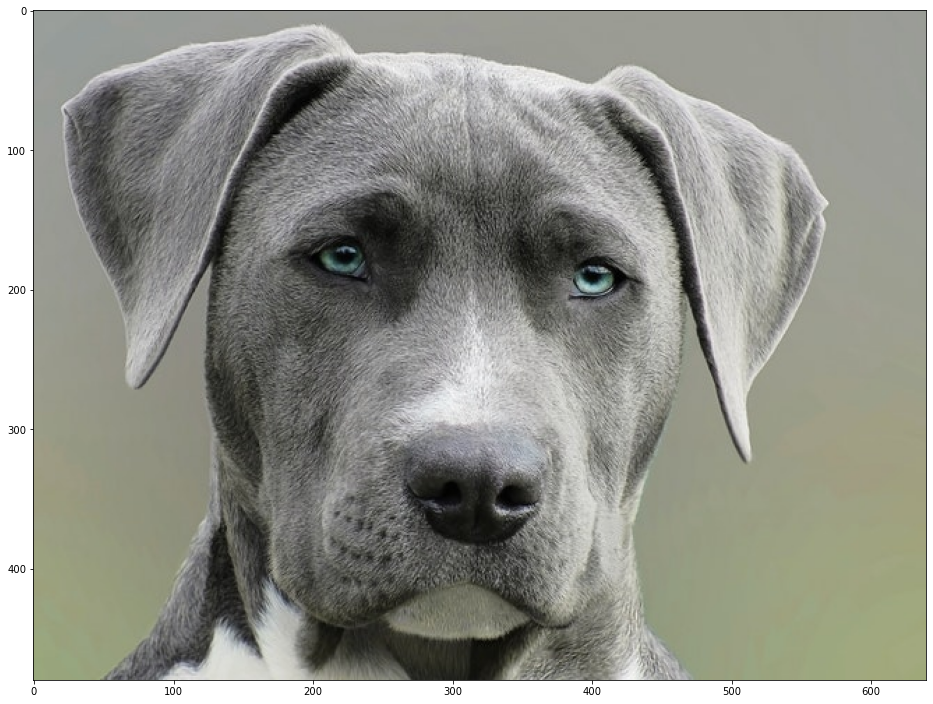

In [9]:
img_path = 'img/01.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(16, 16))
plt.imshow(img)

# Detect Faces

Detection 0: Left: 84 Top: 47 Right: 506 Bottom: 469 Confidence: 1.0394072532653809


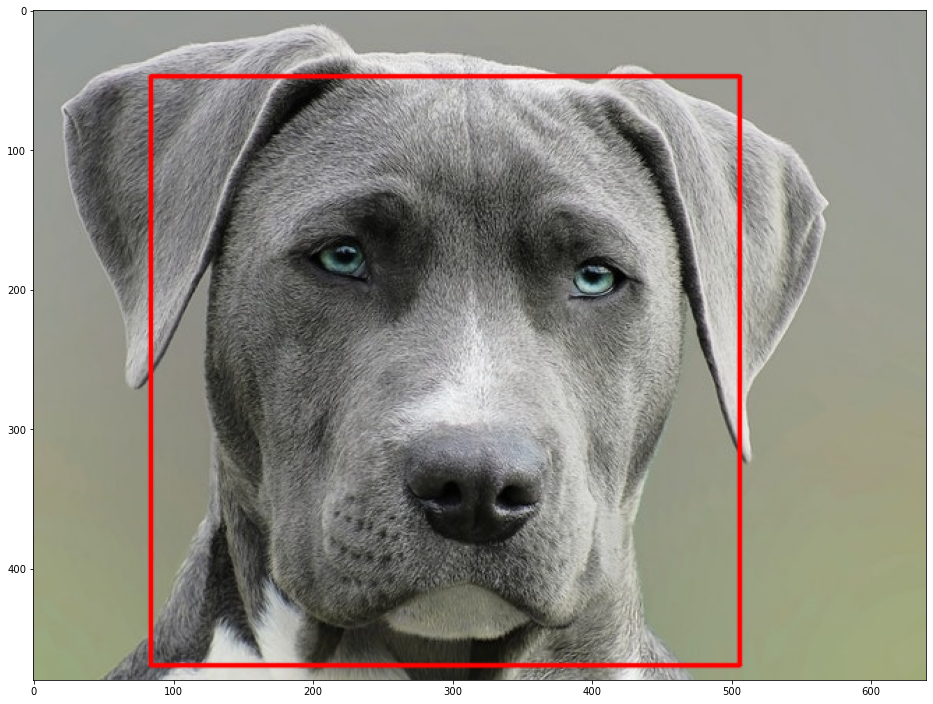

In [10]:
dets = detector(img, upsample_num_times=1)

print(dets)

img_result = img.copy()

for i, d in enumerate(dets):
    print(f"Detection {i}: Left: {d.rect.left()} Top: {d.rect.top()} Right: {d.rect.right()} Bottom: {d.rect.bottom()} Confidence: {d.confidence}")

    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()

    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255,0,0), lineType=cv2.LINE_AA)
    
plt.figure(figsize=(16, 16))
plt.imshow(img_result)

# Detect Landmarks

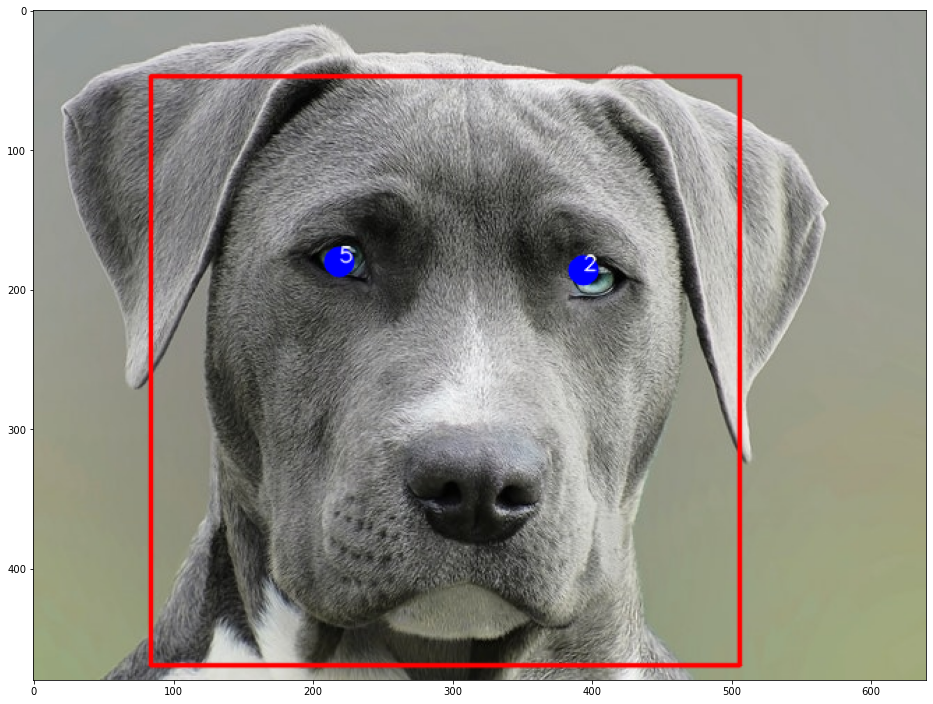

In [13]:
shapes = []
for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shape = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shape):
        # 5 right eye
        # 3 left eye
        if i != 5 and i !=2:
            continue
        shapes.append(shape)
        cv2.circle(img_result, center=tuple(p), radius=10, color=(0,0,255), thickness=-1, lineType=cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1, cv2.LINE_AA)

img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
cv2.imwrite('img/%s_out%s' % (filename, ext), img_out)
plt.figure(figsize=(16, 16))
plt.imshow(img_result)